In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd 

In [119]:
url = "https://github.com/motazsaad/work-online-ds/raw/master/data/melbourne-housing-market/Melbourne_housing_FULL.csv"

dataframe = pd.read_csv(url)
dataframe.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


# Remove object columns and remove records with missing values 

In [120]:
dataframe = dataframe.select_dtypes(exclude=['object']).dropna(axis=0)
dataframe.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


In [121]:
train, test = train_test_split(dataframe, test_size=0.2)
print(len(train), 'train examples')
print(len(test), 'test examples')

7109 train examples
1778 test examples


In [122]:
train_y = train.pop('Price')
test_y = test.pop('Price')

# The label column has now been removed from the features.
train.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
30510,3,3.4,3031.0,3.0,2.0,2.0,176.0,212.0,1900.0,-37.79560,144.93419,5263.0
12039,4,5.3,3032.0,3.0,3.0,2.0,650.0,242.0,1925.0,-37.77960,144.93500,1052.0
17290,2,5.1,3011.0,2.0,1.0,1.0,152.0,91.0,1910.0,-37.80697,144.89280,2417.0
19388,4,34.7,3977.0,4.0,2.0,0.0,579.0,149.0,1990.0,-38.07202,145.27369,6464.0
31629,2,6.7,3058.0,2.0,1.0,1.0,236.0,97.0,1900.0,-37.73936,144.96454,11204.0


In [0]:
def input_fn(features, labels, training=True, batch_size=64):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [124]:
train.keys()

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [125]:
feature_columns = []

# numeric cols
for col in train.keys():
  feature_columns.append(feature_column.numeric_column(col))
feature_columns

[NumericColumn(key='Rooms', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Distance', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Postcode', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Bedroom2', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Bathroom', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Car', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Landsize', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='BuildingArea', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='YearBuilt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Lattitude', shape=(1,), default_value=None, dtype=tf.float32, nor

In [126]:
estimator = tf.estimator.DNNRegressor(
    feature_columns=feature_columns,
    hidden_units=[1024, 512, 256, 128])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7yhaqqx6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7a9fb84ba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [127]:
estimator.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=1000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp7yhaqqx6/model.ckpt.
INFO:tensorflow:loss = 1717883600000.0, step = 0
INFO:tensorflow:global_step/sec: 57.9086
INFO:tensorflow:loss = 745812000000.0, step = 100 (1.732 sec)
INFO:tensorflow:global_step/sec: 61.1145
INF

In [128]:
eval_result = estimator.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-09-12T03:41:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7yhaqqx6/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-09-12-03:41:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 460432240000.0, global_step = 1000, label/mean = 1075904

In [129]:
eval_result

{'average_loss': 460432240000.0,
 'global_step': 1000,
 'label/mean': 1075904.8,
 'loss': 460596180000.0,
 'prediction/mean': 1105707.4}

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7yhaqqx6/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Text(0, 0.5, 'predicted values')

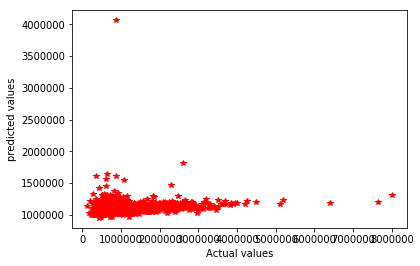

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

predictions=[]
for pred in estimator.predict(input_fn=lambda: input_fn(test, test_y, training=False)):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(test_y, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

In [131]:
# RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_y, predictions))**0.5

823.7424328585294